# Naive Bayes and K-Nearest Neighbours from Scratch (Titanic Dataset)

This notebook implements **Naive Bayes** and **K-Nearest Neighbours (KNN)** classifiers from scratch using only `NumPy`, `Pandas`, and `Matplotlib`. We apply them to the Titanic dataset to predict survival.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Japan Pancholi


## Load and Preprocess Data

In [8]:
# Load dataset — make sure train.csv is in the same directory as the notebook
df = pd.read_csv('train.csv')

def preprocess_titanic(df):
    df = df.copy()
    df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Fare"].fillna(df["Fare"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
    df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})
    return df

cleaned_df = preprocess_titanic(df)
X = cleaned_df.drop(columns=["Survived"])
y = cleaned_df["Survived"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\Users\Japan Pancholi\AppData\Local\Temp\ipykernel_4760\2633798868.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Japan Pancholi\AppData\Local\Temp\ipykernel_4760\2633798868.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

## Naive Bayes Classifier

In [9]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-6
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        return np.array([self._predict_row(X.iloc[i]) for i in range(X.shape[0])])

    def _predict_row(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.var[c]))
            likelihood -= 0.5 * np.sum(((x - self.mean[c]) ** 2) / self.var[c])
            posteriors.append(prior + likelihood)
        return self.classes[np.argmax(posteriors)]

## K-Nearest Neighbours Classifier

In [10]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.values
        self.y_train = y.values

    def predict(self, X):
        return np.array([self._predict_row(x) for x in X.values])

    def _predict_row(self, x):
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        return np.bincount(k_nearest_labels).argmax()

## Train and Evaluate Models

In [11]:
from sklearn.metrics import accuracy_score
# Naive Bayes
nb = NaiveBayes()
nb.fit(x_train, y_train)
nb_preds = nb.predict(x_test)
nb_accuracy = accuracy_score(y_test, nb_preds)

# KNN
knn = KNN(k=5)
knn.fit(x_train, y_train)
knn_preds = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_preds)

print(f"Naive Bayes Accuracy: {nb_accuracy:.2f}")
print(f"KNN Accuracy: {knn_accuracy:.2f}")

Naive Bayes Accuracy: 0.80
KNN Accuracy: 0.70


## Visualization

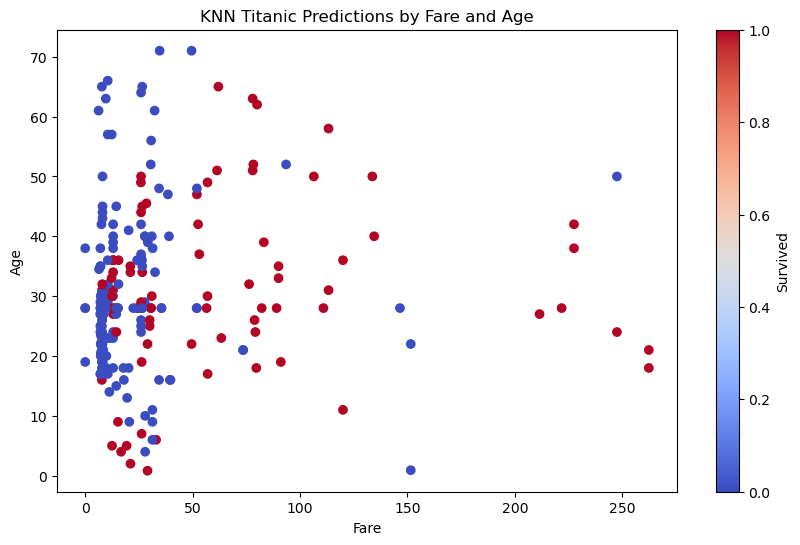

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test['Fare'], x_test['Age'], c=knn_preds, cmap='coolwarm', label='KNN Predictions')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('KNN Titanic Predictions by Fare and Age')
plt.colorbar(label='Survived')
plt.show()

## Explanation
**Naive Bayes:**
- Assumes feature independence and normal distribution.
- Calculates the probability for each class using mean, variance, and class priors.

**KNN:**
- Computes distances to all training points.
- Picks `k` nearest and returns the most common label.

**Preprocessing:**
- Selected relevant columns.
- Filled missing `Age`, `Fare`, and `Embarked` with median or mode.
- Encoded `Sex` and `Embarked` to numeric values.

**Evaluation:**
- Accuracy was used to evaluate both classifiers.
- Data was split into 70% training and 30% testing.

These implementations are from scratch and do not use any machine learning libraries for training the models.